# Set-Based Reinforcement Learning Hopper Environment

In this notebook, we implement a set-based reinforcement learning algorithm, which is based on the paper [Training Verifiably Robust Agents using Set-Based Reinforcement Learning](https://arxiv.org/abs/2408.09112). 

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('../..')
from SBML import ZonoTorch as zt
from SBML import SBRL as sbrl

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

seed = 0

seedtorch = torch.random.manual_seed(seed)
seednp = np.random.seed(seed)

Actor and Critic models are implemented using PyTorch. The actor and critic are simple feedforward neural networks with 2 hidden layers.

In [2]:
actor = torch.nn.Sequential(
    torch.nn.Linear(11, 400),
    torch.nn.ReLU(),
    torch.nn.Linear(400, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 3),
    torch.nn.Tanh()
)

critic = torch.nn.Sequential(
    torch.nn.Linear(14, 400),
    torch.nn.ReLU(),
    torch.nn.Linear(400, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 1)
)

In [3]:
env_options = {
    'max_step': 1000,
}

senv = sbrl.GymEnvironment('Hopper-v2',env_options, DEVICE)

ddpg_ops = {
    'actor_lr': 1e-4,
    'actor_train_mode': 'set',
    'critic_lr': 1e-3,
    'critic_l2': 0.01,
    'critic_train_mode': 'set',
    'gamma': 0.99,
    'tau': 0.001,
    'buffer_size': 5e5,
    'batch_size': 64,
    'exp_noise': 0.2,
    'action_ub': 1,
    'action_lb': -1,
    'noise': 0.1,
    'actor_eta': 0.01,
    'actor_omega': 0.5,
    'actor_adv_num_samples': 100,
}
agent = sbrl.DDPG(actor,critic,ddpg_ops,DEVICE)

/home/manuel/ETH_Code/SemProj/SetBasedRL/.venv/lib/python3.8/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Hopper-v2 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/home/manuel/ETH_Code/SemProj/SetBasedRL/.venv/lib/python3.8/site-packages/gym/envs/mujoco/mujoco_env.py:190: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(


In [4]:
agent.train(senv,2e6,True)

Reinforcment Learning Parameters:
Standard-RL Options:
--------------------
Discount Factor (gamma): 0.99
Buffer Size: 500000.0
Batch Size: 64
Steps: 2000000.0
Device: cuda

Actor Options:
--------------
Learning Rate: 0.0001
Training Mode: set
Eta: 0.01
Omega: 0.5
Noise: 0.1

Critic Options:
---------------
Learning Rate: 0.001
Training Mode: set
Eta: 0.01




/home/manuel/ETH_Code/SemProj/SetBasedRL/.venv/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Found 4 GPUs for rendering. Using device 0.
Training Information:
|Step           |Time   |Reward         |Q-Value        |Critic-Loss    |Actor-Loss     |
|---------------|-------|---------------|---------------|---------------|---------------|
|1.00e+00	|0.0	|9.94e-01	|1.32e-03	|0.00e+00	|0.00e+00	|
|1.00e+03	|2.2	|1.96e+01	|2.12e+00	|2.17e-01	|-2.43e+00	|
|2.00e+03	|4.5	|3.57e+01	|2.89e+00	|3.09e-01	|-3.74e+00	|
|3.00e+03	|6.6	|6.54e+00	|3.72e+00	|4.49e-01	|-5.02e+00	|
|4.00e+03	|8.7	|1.84e+01	|4.66e+00	|6.04e-01	|-6.38e+00	|
|5.00e+03	|10.8	|8.79e+01	|5.71e+00	|7.04e-01	|-7.64e+00	|
|6.00e+03	|12.9	|2.64e+01	|6.91e+00	|7.85e-01	|-9.27e+00	|
|7.00e+03	|15.0	|2.93e+01	|8.34e+00	|9.71e-01	|-1.09e+01	|
|8.00e+03	|17.1	|9.52e+01	|1.04e+01	|1.30e+00	|-1.26e+01	|
|9.00e+03	|19.2	|7.10e+01	|1.21e+01	|1.47e+00	|-1.44e+01	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-287-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemP

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-287-episode-0.mp4
Evaluation Reward: 84.56401977539062
|1.00e+04	|21.3	|1.05e+00	|1.39e+01	|1.50e+00	|-1.63e+01	|
|1.10e+04	|23.4	|1.56e+02	|1.63e+01	|2.21e+00	|-1.82e+01	|
|1.20e+04	|25.5	|6.47e+00	|1.83e+01	|2.26e+00	|-2.09e+01	|
|1.30e+04	|27.6	|6.75e+01	|2.10e+01	|2.36e+00	|-2.24e+01	|
|1.40e+04	|29.7	|1.71e+02	|2.26e+01	|3.36e+00	|-2.47e+01	|
|1.50e+04	|31.8	|5.77e+01	|2.57e+01	|4.25e+00	|-2.73e+01	|
|1.60e+04	|33.9	|9.13e+01	|2.88e+01	|5.25e+00	|-2.95e+01	|
|1.70e+04	|36.0	|1.36e+02	|3.21e+01	|5.22e+00	|-3.24e+01	|
|1.80e+04	|38.1	|9.01e+01	|3.48e+01	|6.60e+00	|-3.48e+01	|
|1.90e+04	|40.2	|2.47e+01	|3.63e+01	|6.42e+00	|-3.77e+01	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-393-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-393-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-393-episode-0.mp4
Evaluation Reward: 237.2274169921875
|2.00e+04	|42.3	|1.05e+00	|4.06e+01	|4.10e+00	|-4.19e+01	|
|2.10e+04	|44.4	|5.32e+00	|4.33e+01	|4.34e+00	|-4.41e+01	|
|2.20e+04	|46.5	|1.44e+02	|4.77e+01	|7.99e+00	|-4.56e+01	|
|2.30e+04	|48.6	|4.28e+01	|5.01e+01	|1.08e+01	|-4.87e+01	|
|2.40e+04	|50.7	|2.10e+02	|5.26e+01	|8.80e+00	|-5.16e+01	|
|2.50e+04	|52.8	|2.88e+01	|5.70e+01	|9.53e+00	|-5.48e+01	|
|2.60e+04	|54.8	|1.99e+02	|6.09e+01	|1.00e+01	|-5.77e+01	|
|2.70e+04	|56.9	|1.18e+02	|6.51e+01	|1.32e+01	|-6.02e+01	|
|2.80e+04	|59.0	|6.42e+00	|6.98e+01	|1.63e+01	|-6.32e+01	|
|2.90e+04	|61.1	|5.25e+01	|7.39e+01	|1.21e+01	|-6.54e+01	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-490-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-490-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-490-episode-0.mp4
Evaluation Reward: 283.2254150390625
|3.00e+04	|63.3	|1.01e+00	|8.08e+01	|4.48e+00	|-6.92e+01	|
|3.10e+04	|65.4	|6.33e+00	|8.33e+01	|7.76e+00	|-7.36e+01	|
|3.20e+04	|67.5	|2.25e+02	|8.55e+01	|1.50e+01	|-7.42e+01	|
|3.30e+04	|69.5	|2.28e+02	|9.04e+01	|1.54e+01	|-7.76e+01	|
|3.40e+04	|71.7	|3.51e+02	|9.17e+01	|1.83e+01	|-8.02e+01	|
|3.50e+04	|73.8	|2.61e+02	|9.33e+01	|1.96e+01	|-8.33e+01	|
|3.60e+04	|75.9	|8.36e+01	|1.01e+02	|1.90e+01	|-8.67e+01	|
|3.70e+04	|78.0	|2.62e+02	|1.04e+02	|2.14e+01	|-8.99e+01	|
|3.80e+04	|80.1	|4.44e+02	|1.12e+02	|2.52e+01	|-9.32e+01	|
|3.90e+04	|82.2	|6.48e+01	|1.12e+02	|3.16e+01	|-9.71e+01	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-573-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-573-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-573-episode-0.mp4
Evaluation Reward: 268.646484375
|4.00e+04	|84.3	|1.08e+00	|1.21e+02	|2.11e+01	|-1.09e+02	|
|4.10e+04	|86.4	|1.31e+02	|1.21e+02	|4.21e+01	|-1.04e+02	|
|4.20e+04	|88.5	|1.89e+02	|1.25e+02	|5.12e+01	|-1.08e+02	|
|4.30e+04	|90.6	|3.92e+01	|1.26e+02	|6.06e+01	|-1.13e+02	|
|4.40e+04	|92.7	|6.87e+01	|1.38e+02	|7.71e+01	|-1.17e+02	|
|4.50e+04	|94.8	|5.11e+01	|1.39e+02	|9.28e+01	|-1.20e+02	|
|4.60e+04	|96.9	|5.24e+01	|1.36e+02	|1.35e+02	|-1.23e+02	|
|4.70e+04	|99.0	|8.38e+01	|1.32e+02	|1.41e+02	|-1.22e+02	|
|4.80e+04	|101.1	|5.58e+00	|1.36e+02	|1.60e+02	|-1.26e+02	|
|4.90e+04	|103.2	|5.44e+00	|1.30e+02	|1.36e+02	|-1.27e+02	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-815-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-815-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-815-episode-0.mp4


Evaluation Reward: 1.2592162132263183
|5.00e+04	|105.3	|8.96e-01	|1.32e+02	|8.62e+01	|-1.25e+02	|
|5.10e+04	|107.3	|6.22e+00	|1.37e+02	|2.02e+02	|-1.20e+02	|
|5.20e+04	|109.4	|3.12e+01	|1.29e+02	|3.30e+02	|-1.17e+02	|
|5.30e+04	|111.5	|3.34e+00	|1.56e+02	|2.70e+02	|-1.21e+02	|
|5.40e+04	|113.6	|6.68e+00	|2.01e+02	|3.98e+02	|-1.09e+02	|
|5.50e+04	|115.7	|1.02e+01	|2.65e+02	|5.46e+02	|-1.08e+02	|
|5.60e+04	|117.8	|1.72e+01	|3.40e+02	|5.81e+02	|-1.14e+02	|
|5.70e+04	|119.9	|4.08e+01	|4.08e+02	|6.20e+02	|-1.17e+02	|
|5.80e+04	|122.0	|3.03e+01	|4.66e+02	|7.69e+02	|-1.24e+02	|
|5.90e+04	|124.1	|8.04e+01	|4.96e+02	|7.82e+02	|-1.28e+02	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1138-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1138-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1138-episode-0.mp4
Evaluation Reward: 98.41878662109374
|6.00e+04	|126.2	|9.30e-01	|5.37e+02	|7.91e+02	|-1.60e+02	|
|6.10e+04	|128.3	|9.32e+00	|5.41e+02	|1.20e+03	|-1.56e+02	|
|6.20e+04	|130.4	|7.33e+00	|4.85e+02	|1.60e+03	|-1.92e+02	|
|6.30e+04	|132.5	|3.80e+01	|3.24e+02	|2.80e+03	|-1.67e+02	|
|6.40e+04	|134.5	|2.80e+02	|1.22e+02	|3.60e+03	|-1.57e+02	|
|6.50e+04	|136.6	|3.71e+01	|-2.17e+01	|3.37e+03	|-1.32e+02	|
|6.60e+04	|138.7	|3.08e+01	|-5.75e+01	|2.72e+03	|-1.26e+02	|
|6.70e+04	|140.8	|4.11e+00	|2.72e+02	|2.11e+03	|-1.55e+02	|
|6.80e+04	|142.9	|4.44e+01	|4.13e+02	|3.03e+03	|-1.88e+02	|
|6.90e+04	|145.0	|2.33e+01	|6.58e+02	|3.26e+03	|-2.34e+02	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1401-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1401-e

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1401-episode-0.mp4


Evaluation Reward: 37.81466064453125
|7.00e+04	|147.1	|9.82e-01	|8.53e+02	|2.66e+03	|-2.46e+02	|
|7.10e+04	|149.1	|1.78e+01	|1.04e+03	|3.28e+03	|-3.15e+02	|
|7.20e+04	|151.2	|3.21e+01	|1.08e+03	|2.92e+03	|-3.50e+02	|
|7.30e+04	|153.3	|3.78e+00	|1.03e+03	|4.16e+03	|-4.32e+02	|
|7.40e+04	|155.4	|1.58e+01	|1.18e+03	|5.71e+03	|-4.13e+02	|
|7.50e+04	|157.5	|1.31e+01	|1.22e+03	|5.17e+03	|-4.14e+02	|
|7.60e+04	|159.6	|9.17e+00	|1.29e+03	|4.81e+03	|-4.44e+02	|
|7.70e+04	|161.6	|6.69e+02	|1.13e+03	|6.61e+03	|-4.48e+02	|
|7.80e+04	|163.7	|6.39e+02	|8.72e+02	|7.57e+03	|-4.57e+02	|
|7.90e+04	|165.8	|6.32e+02	|5.61e+02	|8.68e+03	|-4.65e+02	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1703-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1703-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-1703-episode-0.mp4
Evaluation Reward: 973.35224609375
|8.00e+04	|168.2	|1.00e+00	|1.28e+02	|1.02e+04	|-3.53e+02	|
|8.10e+04	|170.2	|1.04e+00	|-7.45e+01	|7.06e+03	|-4.77e+02	|
|8.20e+04	|172.3	|1.02e+02	|-7.86e+01	|8.97e+03	|-3.55e+02	|
|8.30e+04	|174.4	|2.64e+00	|-3.16e+01	|7.89e+03	|-3.66e+02	|
|8.40e+04	|176.5	|3.42e+01	|4.59e+01	|1.61e+04	|-4.14e+02	|
|8.50e+04	|178.6	|8.54e+01	|3.32e+01	|1.90e+04	|-4.21e+02	|
|8.60e+04	|180.7	|3.09e+00	|8.92e+01	|3.34e+04	|-4.21e+02	|
|8.70e+04	|182.7	|7.96e+00	|1.97e+02	|3.21e+04	|-4.58e+02	|
|8.80e+04	|184.8	|3.93e+01	|1.84e+02	|2.67e+04	|-5.44e+02	|
|8.90e+04	|186.9	|3.11e+00	|2.60e+02	|1.69e+04	|-5.41e+02	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2131-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2131-ep

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2131-episode-0.mp4
Evaluation Reward: 2.6365034103393556


|9.00e+04	|189.0	|8.95e-01	|2.47e+02	|3.81e+04	|-8.06e+02	|
|9.10e+04	|191.1	|3.37e+00	|2.23e+02	|2.06e+04	|-7.14e+02	|
|9.20e+04	|193.2	|3.88e+00	|2.10e+02	|4.32e+04	|-8.20e+02	|
|9.30e+04	|195.3	|8.78e+00	|1.66e+02	|2.71e+04	|-9.13e+02	|
|9.40e+04	|197.3	|1.05e+01	|1.33e+02	|3.11e+04	|-1.02e+03	|
|9.50e+04	|199.4	|6.51e+00	|5.49e+02	|4.49e+04	|-1.17e+03	|
|9.60e+04	|201.5	|8.52e+00	|8.59e+02	|4.43e+04	|-1.33e+03	|
|9.70e+04	|203.6	|1.07e+01	|1.24e+03	|6.59e+04	|-1.68e+03	|
|9.80e+04	|205.7	|1.98e+00	|1.48e+03	|8.53e+04	|-2.18e+03	|
|9.90e+04	|207.8	|5.72e+00	|2.11e+03	|1.32e+05	|-2.39e+03	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2739-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2739-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2739-episode-0.mp4


Evaluation Reward: 6.6378334045410154
|1.00e+05	|209.8	|9.84e-01	|2.50e+03	|1.12e+05	|-2.78e+03	|
|1.01e+05	|211.9	|9.13e+00	|2.85e+03	|1.37e+05	|-2.87e+03	|
|1.02e+05	|214.0	|1.24e+01	|3.24e+03	|1.63e+05	|-3.31e+03	|
|1.03e+05	|216.1	|7.00e+02	|3.24e+03	|1.70e+05	|-3.47e+03	|
|1.04e+05	|218.2	|1.96e+02	|3.74e+03	|2.01e+05	|-3.83e+03	|
|1.05e+05	|220.3	|1.95e+02	|4.01e+03	|2.15e+05	|-4.07e+03	|
|1.06e+05	|222.3	|6.61e+01	|4.40e+03	|2.04e+05	|-4.27e+03	|
|1.07e+05	|224.4	|4.06e+01	|4.88e+03	|2.03e+05	|-4.49e+03	|
|1.08e+05	|226.5	|8.53e+01	|5.85e+03	|2.69e+05	|-5.08e+03	|
|1.09e+05	|228.6	|1.13e+02	|7.17e+03	|3.42e+05	|-5.54e+03	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2891-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2891-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-2891-episode-0.mp4
Evaluation Reward: 148.54345703125
|1.10e+05	|230.7	|9.50e-01	|8.89e+03	|1.62e+05	|-5.94e+03	|
|1.11e+05	|232.8	|9.38e+01	|1.13e+04	|3.19e+05	|-7.04e+03	|
|1.12e+05	|234.9	|1.39e+02	|1.37e+04	|3.30e+05	|-7.73e+03	|
|1.13e+05	|237.0	|2.67e+02	|1.56e+04	|3.48e+05	|-8.54e+03	|
|1.14e+05	|239.0	|1.29e+02	|1.72e+04	|4.07e+05	|-9.53e+03	|
|1.15e+05	|241.1	|5.90e+01	|1.83e+04	|4.99e+05	|-9.98e+03	|
|1.16e+05	|243.2	|1.64e+02	|1.96e+04	|5.14e+05	|-1.03e+04	|
|1.17e+05	|245.3	|9.07e+01	|1.97e+04	|6.34e+05	|-1.03e+04	|
|1.18e+05	|247.4	|1.53e+01	|1.90e+04	|6.92e+05	|-1.06e+04	|
|1.19e+05	|249.5	|3.33e+00	|1.90e+04	|5.48e+05	|-9.10e+03	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3004-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3004-episo

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3004-episode-0.mp4
Evaluation Reward: 12.262886810302735
|1.20e+05	|251.6	|9.52e-01	|1.86e+04	|2.87e+05	|-1.10e+04	|
|1.21e+05	|253.6	|9.70e+00	|1.98e+04	|8.65e+05	|-1.07e+04	|
|1.22e+05	|255.7	|7.34e+00	|2.17e+04	|1.06e+06	|-1.14e+04	|
|1.23e+05	|257.8	|1.76e+00	|2.49e+04	|1.16e+06	|-1.46e+04	|
|1.24e+05	|259.9	|5.71e+00	|2.82e+04	|1.70e+06	|-1.38e+04	|
|1.25e+05	|262.0	|1.04e+01	|3.47e+04	|3.08e+06	|-1.59e+04	|
|1.26e+05	|264.1	|8.34e+00	|4.34e+04	|3.82e+06	|-1.76e+04	|
|1.27e+05	|266.2	|1.60e+01	|5.56e+04	|5.56e+06	|-2.28e+04	|
|1.28e+05	|268.2	|3.25e+01	|6.93e+04	|9.62e+06	|-2.75e+04	|
|1.29e+05	|270.3	|3.96e+01	|9.17e+04	|1.37e+07	|-3.62e+04	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3233-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3233-ep

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3233-episode-0.mp4
Evaluation Reward: 57.916998291015624
|1.30e+05	|272.4	|9.26e-01	|1.19e+05	|1.78e+07	|-5.26e+04	|
|1.31e+05	|274.5	|5.61e+01	|1.44e+05	|2.63e+07	|-5.29e+04	|
|1.32e+05	|276.6	|8.02e+00	|1.78e+05	|3.44e+07	|-6.71e+04	|
|1.33e+05	|278.7	|2.56e+00	|2.19e+05	|6.91e+07	|-8.61e+04	|
|1.34e+05	|280.8	|8.76e+00	|2.70e+05	|9.23e+07	|-1.02e+05	|
|1.35e+05	|282.9	|5.01e+00	|3.22e+05	|9.67e+07	|-1.21e+05	|
|1.36e+05	|284.9	|1.31e+02	|3.82e+05	|2.35e+08	|-1.43e+05	|
|1.37e+05	|287.0	|3.72e+01	|4.62e+05	|2.87e+08	|-1.73e+05	|
|1.38e+05	|289.1	|4.56e+01	|5.51e+05	|3.61e+08	|-2.07e+05	|
|1.39e+05	|291.2	|3.74e+01	|6.69e+05	|5.84e+08	|-2.59e+05	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3321-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3321-ep

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3321-episode-0.mp4
Evaluation Reward: 127.87989501953125
|1.40e+05	|293.3	|9.99e-01	|7.92e+05	|8.19e+08	|-2.75e+05	|
|1.41e+05	|295.4	|4.85e+01	|9.49e+05	|1.13e+09	|-3.49e+05	|
|1.42e+05	|297.5	|7.64e+00	|1.13e+06	|1.08e+09	|-4.23e+05	|
|1.43e+05	|299.6	|1.99e+01	|1.27e+06	|2.36e+09	|-5.24e+05	|
|1.44e+05	|301.7	|6.75e+01	|1.44e+06	|3.79e+09	|-5.90e+05	|
|1.45e+05	|303.8	|1.74e+02	|1.67e+06	|4.40e+09	|-6.74e+05	|
|1.46e+05	|305.9	|1.93e+02	|1.91e+06	|5.44e+09	|-7.81e+05	|
|1.47e+05	|307.9	|6.50e+01	|2.19e+06	|8.74e+09	|-9.26e+05	|
|1.48e+05	|310.0	|1.61e+02	|2.47e+06	|1.06e+10	|-1.04e+06	|
|1.49e+05	|312.1	|1.14e+02	|2.84e+06	|1.37e+10	|-1.20e+06	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3390-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3390-ep

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3390-episode-0.mp4
Evaluation Reward: 390.214306640625
|1.50e+05	|314.3	|1.01e+00	|3.18e+06	|6.67e+10	|-1.55e+06	|
|1.51e+05	|316.4	|7.50e+01	|3.64e+06	|2.34e+10	|-1.54e+06	|
|1.52e+05	|318.5	|2.13e+02	|3.99e+06	|2.84e+10	|-1.74e+06	|
|1.53e+05	|320.6	|2.42e+02	|4.45e+06	|3.43e+10	|-1.97e+06	|
|1.54e+05	|322.7	|3.44e+02	|4.99e+06	|3.90e+10	|-2.17e+06	|
|1.55e+05	|324.7	|5.11e+01	|5.60e+06	|6.06e+10	|-2.54e+06	|
|1.56e+05	|326.8	|6.60e+00	|6.17e+06	|6.79e+10	|-2.79e+06	|
|1.57e+05	|328.9	|3.13e+02	|6.66e+06	|7.06e+10	|-3.07e+06	|
|1.58e+05	|331.0	|2.59e+02	|7.42e+06	|8.60e+10	|-3.43e+06	|
|1.59e+05	|333.1	|2.00e+02	|8.21e+06	|1.29e+11	|-3.83e+06	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3433-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3433-epis

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3433-episode-0.mp4
Evaluation Reward: 921.9837890625
|1.60e+05	|335.4	|9.98e-01	|9.24e+06	|1.24e+11	|-4.86e+06	|
|1.61e+05	|337.5	|1.72e+02	|1.02e+07	|1.68e+11	|-4.74e+06	|
|1.62e+05	|339.6	|1.21e+02	|1.12e+07	|2.38e+11	|-5.31e+06	|
|1.63e+05	|341.7	|3.42e+02	|1.21e+07	|2.35e+11	|-5.72e+06	|
|1.64e+05	|343.7	|3.33e+02	|1.30e+07	|2.76e+11	|-6.29e+06	|
|1.65e+05	|345.8	|2.59e+02	|1.46e+07	|3.60e+11	|-7.00e+06	|
|1.66e+05	|347.9	|6.27e+02	|1.54e+07	|4.18e+11	|-7.58e+06	|
|1.67e+05	|350.0	|6.23e+02	|1.65e+07	|4.42e+11	|-8.30e+06	|
|1.68e+05	|352.1	|6.25e+02	|1.82e+07	|5.65e+11	|-9.08e+06	|
|1.69e+05	|354.2	|2.24e+02	|2.03e+07	|6.90e+11	|-1.03e+07	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3460-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3460-episod

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3460-episode-0.mp4
Evaluation Reward: 964.35537109375
|1.70e+05	|356.5	|1.01e+00	|2.26e+07	|4.47e+11	|-1.17e+07	|
|1.71e+05	|358.6	|2.09e+02	|2.40e+07	|9.05e+11	|-1.22e+07	|
|1.72e+05	|360.7	|2.11e+02	|2.63e+07	|1.04e+12	|-1.33e+07	|
|1.73e+05	|362.8	|1.39e+02	|2.88e+07	|1.18e+12	|-1.43e+07	|
|1.74e+05	|364.9	|7.46e+02	|2.95e+07	|1.47e+12	|-1.54e+07	|
|1.75e+05	|366.9	|3.79e+02	|3.27e+07	|1.89e+12	|-1.69e+07	|
|1.76e+05	|369.0	|2.94e+00	|3.62e+07	|1.07e+12	|-1.57e+07	|
|1.77e+05	|371.1	|8.14e+01	|3.88e+07	|2.42e+12	|-2.04e+07	|
|1.78e+05	|373.2	|1.93e+02	|4.08e+07	|2.60e+12	|-2.17e+07	|
|1.79e+05	|375.3	|2.09e+02	|4.34e+07	|2.71e+12	|-2.34e+07	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3487-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3487-episo

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3487-episode-0.mp4
Evaluation Reward: 525.439013671875
|1.80e+05	|377.5	|9.92e-01	|4.76e+07	|2.54e+12	|-2.35e+07	|
|1.81e+05	|379.6	|3.13e+02	|4.94e+07	|4.64e+12	|-2.67e+07	|
|1.82e+05	|381.7	|2.16e+02	|5.33e+07	|4.65e+12	|-2.87e+07	|
|1.83e+05	|383.8	|1.54e+02	|5.60e+07	|5.38e+12	|-3.07e+07	|
|1.84e+05	|385.9	|1.98e+02	|5.94e+07	|6.53e+12	|-3.28e+07	|
|1.85e+05	|388.0	|7.57e+01	|6.34e+07	|7.07e+12	|-3.48e+07	|
|1.86e+05	|390.0	|5.01e+00	|6.77e+07	|7.80e+12	|-3.60e+07	|
|1.87e+05	|392.1	|1.61e+01	|7.13e+07	|7.90e+12	|-3.82e+07	|
|1.88e+05	|394.2	|1.08e+02	|7.41e+07	|9.00e+12	|-4.08e+07	|
|1.89e+05	|396.3	|4.78e+01	|7.87e+07	|9.98e+12	|-4.41e+07	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3530-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3530-epis

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3530-episode-0.mp4
Evaluation Reward: 281.92666015625
|1.90e+05	|398.5	|1.03e+00	|8.13e+07	|3.39e+13	|-5.61e+07	|
|1.91e+05	|400.6	|4.87e+01	|8.60e+07	|1.30e+13	|-4.88e+07	|
|1.92e+05	|402.6	|1.35e+02	|8.75e+07	|1.30e+13	|-5.07e+07	|
|1.93e+05	|404.7	|7.04e+01	|9.19e+07	|1.54e+13	|-5.40e+07	|
|1.94e+05	|406.8	|2.41e+01	|9.54e+07	|1.81e+13	|-5.61e+07	|
|1.95e+05	|408.9	|5.81e+01	|9.86e+07	|1.61e+13	|-5.95e+07	|
|1.96e+05	|411.0	|7.28e+01	|1.02e+08	|1.99e+13	|-6.17e+07	|
|1.97e+05	|413.1	|5.78e+01	|1.05e+08	|2.12e+13	|-6.42e+07	|
|1.98e+05	|415.2	|5.77e+01	|1.08e+08	|2.19e+13	|-6.57e+07	|
|1.99e+05	|417.2	|1.82e+01	|1.12e+08	|2.93e+13	|-6.83e+07	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3612-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3612-episo

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3612-episode-0.mp4
Evaluation Reward: 55.83204345703125
|2.00e+05	|419.4	|1.01e+00	|1.15e+08	|1.25e+13	|-7.25e+07	|
|2.01e+05	|421.4	|4.02e+01	|1.18e+08	|3.04e+13	|-7.25e+07	|
|2.02e+05	|423.5	|1.16e+01	|1.21e+08	|2.75e+13	|-7.81e+07	|
|2.03e+05	|425.6	|1.19e+01	|1.25e+08	|1.33e+13	|-7.98e+07	|
|2.04e+05	|427.7	|3.19e+01	|1.27e+08	|4.21e+13	|-8.30e+07	|
|2.05e+05	|429.8	|2.77e+01	|1.30e+08	|3.89e+13	|-8.30e+07	|
|2.06e+05	|431.9	|6.31e+00	|1.34e+08	|2.27e+13	|-8.47e+07	|
|2.07e+05	|434.0	|7.01e+00	|1.36e+08	|4.82e+13	|-8.79e+07	|
|2.08e+05	|436.0	|1.12e+01	|1.39e+08	|3.49e+13	|-9.49e+07	|
|2.09e+05	|438.1	|3.37e+01	|1.42e+08	|3.85e+13	|-9.29e+07	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3751-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3751-epi

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3751-episode-0.mp4
Evaluation Reward: 48.59709167480469
|2.10e+05	|440.2	|9.87e-01	|1.45e+08	|2.43e+13	|-9.72e+07	|
|2.11e+05	|442.3	|2.97e+00	|1.47e+08	|4.30e+13	|-9.86e+07	|
|2.12e+05	|444.4	|8.79e+00	|1.50e+08	|4.69e+13	|-9.75e+07	|
|2.13e+05	|446.5	|3.76e+01	|1.54e+08	|6.29e+13	|-9.97e+07	|
|2.14e+05	|448.6	|2.48e+01	|1.56e+08	|5.59e+13	|-1.02e+08	|
|2.15e+05	|450.7	|1.84e+01	|1.60e+08	|6.52e+13	|-1.05e+08	|
|2.16e+05	|452.8	|2.00e+01	|1.62e+08	|6.25e+13	|-1.05e+08	|
|2.17e+05	|454.8	|3.98e+01	|1.65e+08	|7.48e+13	|-1.07e+08	|
|2.18e+05	|456.9	|3.54e+01	|1.68e+08	|1.01e+14	|-1.10e+08	|
|2.19e+05	|459.0	|1.28e+01	|1.72e+08	|1.12e+14	|-1.13e+08	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3888-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3888-epi

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-3888-episode-0.mp4
Evaluation Reward: 48.5760498046875
|2.20e+05	|461.1	|9.94e-01	|1.76e+08	|5.10e+13	|-1.07e+08	|
|2.21e+05	|463.2	|7.45e+00	|1.80e+08	|6.26e+13	|-1.19e+08	|
|2.22e+05	|465.3	|3.10e+01	|1.82e+08	|1.02e+14	|-1.20e+08	|
|2.23e+05	|467.4	|7.31e+00	|1.89e+08	|7.60e+13	|-1.23e+08	|
|2.24e+05	|469.5	|9.05e+00	|1.95e+08	|1.36e+14	|-1.31e+08	|
|2.25e+05	|471.5	|3.83e+01	|1.98e+08	|1.21e+14	|-1.32e+08	|
|2.26e+05	|473.6	|2.17e+01	|2.06e+08	|1.44e+14	|-1.37e+08	|
|2.27e+05	|475.7	|1.04e+00	|2.14e+08	|4.28e+13	|-1.37e+08	|
|2.28e+05	|477.8	|3.01e+01	|2.22e+08	|1.79e+14	|-1.44e+08	|
|2.29e+05	|479.9	|1.44e+01	|2.31e+08	|1.39e+14	|-1.52e+08	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4035-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4035-epis

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4035-episode-0.mp4
Evaluation Reward: 34.7930908203125
|2.30e+05	|482.0	|1.00e+00	|2.40e+08	|1.70e+14	|-1.47e+08	|
|2.31e+05	|484.1	|1.85e+01	|2.53e+08	|2.02e+14	|-1.66e+08	|
|2.32e+05	|486.2	|1.40e+01	|2.66e+08	|2.23e+14	|-1.77e+08	|
|2.33e+05	|488.2	|1.52e+01	|2.83e+08	|2.74e+14	|-1.91e+08	|
|2.34e+05	|490.3	|5.80e+00	|3.00e+08	|1.79e+14	|-2.03e+08	|
|2.35e+05	|492.4	|1.42e+01	|3.18e+08	|3.89e+14	|-1.99e+08	|
|2.36e+05	|494.5	|3.34e+01	|3.31e+08	|3.67e+14	|-2.10e+08	|
|2.37e+05	|496.6	|1.16e+01	|3.59e+08	|5.58e+14	|-2.22e+08	|
|2.38e+05	|498.7	|4.69e+01	|3.81e+08	|3.77e+14	|-2.29e+08	|
|2.39e+05	|500.8	|1.69e+01	|4.02e+08	|5.65e+14	|-2.36e+08	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4192-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4192-epis

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4192-episode-0.mp4
Evaluation Reward: 70.62403564453125
|2.40e+05	|502.9	|1.02e+00	|4.41e+08	|1.77e+14	|-2.97e+08	|
|2.41e+05	|505.0	|1.23e+01	|4.69e+08	|4.77e+14	|-2.70e+08	|
|2.42e+05	|507.0	|9.95e+01	|5.02e+08	|6.45e+14	|-2.77e+08	|
|2.43e+05	|509.1	|7.92e+01	|5.34e+08	|6.71e+14	|-2.98e+08	|
|2.44e+05	|511.2	|1.70e+02	|5.71e+08	|7.28e+14	|-3.15e+08	|
|2.45e+05	|513.3	|7.71e+02	|5.76e+08	|7.80e+14	|-3.32e+08	|
|2.46e+05	|515.4	|7.84e+02	|6.11e+08	|8.54e+14	|-3.57e+08	|
|2.47e+05	|517.5	|7.91e+02	|6.60e+08	|9.85e+14	|-3.87e+08	|
|2.48e+05	|519.6	|8.03e+02	|6.96e+08	|1.14e+15	|-4.17e+08	|
|2.49e+05	|521.6	|8.06e+02	|7.34e+08	|1.31e+15	|-4.48e+08	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4232-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4232-epi

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4232-episode-0.mp4
Evaluation Reward: 1002.12353515625
|2.50e+05	|524.0	|9.96e-01	|8.19e+08	|4.79e+14	|-5.19e+08	|
|2.51e+05	|526.1	|1.01e+00	|8.48e+08	|6.00e+14	|-5.56e+08	|
|2.52e+05	|528.2	|1.04e+00	|8.85e+08	|1.21e+15	|-5.60e+08	|
|2.53e+05	|530.2	|9.95e-01	|9.01e+08	|1.17e+15	|-5.86e+08	|
|2.54e+05	|532.3	|1.06e+00	|9.56e+08	|1.50e+15	|-6.20e+08	|
|2.55e+05	|534.4	|1.03e+00	|1.02e+09	|2.28e+15	|-6.22e+08	|
|2.56e+05	|536.5	|1.00e+00	|1.05e+09	|4.58e+14	|-7.61e+08	|
|2.57e+05	|538.6	|1.05e+00	|1.08e+09	|7.90e+14	|-7.12e+08	|
|2.58e+05	|540.7	|1.05e+00	|1.11e+09	|1.28e+15	|-7.62e+08	|
|2.59e+05	|542.7	|1.07e+00	|1.15e+09	|4.84e+14	|-8.91e+08	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4252-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4252-epis

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4252-episode-0.mp4
Evaluation Reward: 974.86572265625
|2.60e+05	|545.1	|9.86e-01	|1.18e+09	|3.99e+14	|-9.16e+08	|
|2.61e+05	|547.1	|9.96e-01	|1.19e+09	|3.61e+14	|-9.28e+08	|
|2.62e+05	|549.2	|9.89e-01	|1.23e+09	|6.54e+15	|-8.51e+08	|
|2.63e+05	|551.3	|6.25e+01	|1.24e+09	|4.15e+15	|-9.27e+08	|
|2.64e+05	|553.4	|3.19e+02	|1.25e+09	|3.98e+15	|-9.55e+08	|
|2.65e+05	|555.5	|7.85e+01	|1.29e+09	|3.22e+15	|-9.86e+08	|
|2.66e+05	|557.6	|1.71e+02	|1.31e+09	|4.98e+15	|-1.00e+09	|
|2.67e+05	|559.6	|3.92e+01	|1.32e+09	|3.23e+15	|-1.01e+09	|
|2.68e+05	|561.7	|1.01e+01	|1.33e+09	|1.82e+15	|-1.03e+09	|
|2.69e+05	|563.8	|1.46e+02	|1.35e+09	|4.77e+15	|-1.04e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4295-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4295-episo

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4295-episode-0.mp4
Evaluation Reward: 196.46180419921876
|2.70e+05	|566.0	|1.01e+00	|1.36e+09	|5.49e+15	|-1.09e+09	|
|2.71e+05	|568.0	|1.24e+02	|1.34e+09	|4.48e+15	|-1.06e+09	|
|2.72e+05	|570.1	|6.36e+01	|1.37e+09	|6.61e+15	|-1.05e+09	|
|2.73e+05	|572.2	|3.84e+01	|1.37e+09	|7.18e+15	|-1.07e+09	|
|2.74e+05	|574.3	|8.03e+01	|1.39e+09	|4.18e+15	|-1.08e+09	|
|2.75e+05	|576.4	|1.34e+02	|1.39e+09	|5.77e+15	|-1.07e+09	|
|2.76e+05	|578.5	|1.68e+02	|1.39e+09	|5.75e+15	|-1.07e+09	|
|2.77e+05	|580.5	|1.08e+02	|1.39e+09	|6.42e+15	|-1.08e+09	|
|2.78e+05	|582.6	|8.53e+01	|1.39e+09	|4.71e+15	|-1.07e+09	|
|2.79e+05	|584.7	|3.94e+00	|1.40e+09	|4.47e+15	|-1.06e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4359-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4359-ep

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4359-episode-0.mp4
Evaluation Reward: 160.16810302734376
|2.80e+05	|586.9	|1.03e+00	|1.41e+09	|1.68e+15	|-1.07e+09	|
|2.81e+05	|588.9	|6.59e+01	|1.40e+09	|5.71e+15	|-1.08e+09	|
|2.82e+05	|591.0	|1.28e+01	|1.41e+09	|5.12e+15	|-1.09e+09	|
|2.83e+05	|593.1	|1.69e+01	|1.41e+09	|6.67e+15	|-1.09e+09	|
|2.84e+05	|595.2	|5.41e+01	|1.41e+09	|6.11e+15	|-1.09e+09	|
|2.85e+05	|597.3	|5.21e+01	|1.43e+09	|4.98e+15	|-1.08e+09	|
|2.86e+05	|599.4	|3.00e+01	|1.43e+09	|5.06e+15	|-1.08e+09	|
|2.87e+05	|601.4	|4.77e+00	|1.44e+09	|3.74e+15	|-1.13e+09	|
|2.88e+05	|603.5	|9.34e+00	|1.43e+09	|6.72e+15	|-1.10e+09	|
|2.89e+05	|605.6	|2.61e+01	|1.45e+09	|2.80e+15	|-1.09e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4466-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4466-ep

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4466-episode-0.mp4
Evaluation Reward: 44.39114990234375
|2.90e+05	|607.7	|1.01e+00	|1.45e+09	|1.06e+15	|-1.24e+09	|
|2.91e+05	|609.8	|1.38e+01	|1.47e+09	|9.17e+15	|-1.12e+09	|
|2.92e+05	|611.9	|1.88e+01	|1.49e+09	|6.86e+15	|-1.12e+09	|
|2.93e+05	|614.0	|1.26e+01	|1.50e+09	|5.32e+15	|-1.13e+09	|
|2.94e+05	|616.0	|1.16e+01	|1.52e+09	|7.80e+15	|-1.14e+09	|
|2.95e+05	|618.1	|3.18e+01	|1.53e+09	|6.76e+15	|-1.16e+09	|
|2.96e+05	|620.2	|2.53e+01	|1.55e+09	|5.63e+15	|-1.18e+09	|
|2.97e+05	|622.3	|2.73e+01	|1.58e+09	|5.35e+15	|-1.16e+09	|
|2.98e+05	|624.4	|3.62e+01	|1.58e+09	|5.62e+15	|-1.20e+09	|
|2.99e+05	|626.5	|2.88e+01	|1.60e+09	|6.37e+15	|-1.22e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4616-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4616-epi

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4616-episode-0.mp4
Evaluation Reward: 40.188333129882814
|3.00e+05	|628.6	|1.04e+00	|1.63e+09	|1.20e+15	|-1.37e+09	|
|3.01e+05	|630.6	|4.83e+00	|1.65e+09	|6.76e+15	|-1.23e+09	|
|3.02e+05	|632.7	|4.34e+01	|1.67e+09	|1.16e+16	|-1.24e+09	|
|3.03e+05	|634.8	|3.44e+01	|1.68e+09	|8.93e+15	|-1.26e+09	|
|3.04e+05	|636.9	|2.18e+01	|1.69e+09	|7.53e+15	|-1.26e+09	|
|3.05e+05	|639.0	|3.43e+01	|1.72e+09	|1.15e+16	|-1.29e+09	|
|3.06e+05	|641.1	|4.20e+01	|1.73e+09	|9.73e+15	|-1.28e+09	|
|3.07e+05	|643.1	|4.41e+01	|1.74e+09	|1.04e+16	|-1.33e+09	|
|3.08e+05	|645.2	|2.62e+01	|1.77e+09	|7.23e+15	|-1.32e+09	|
|3.09e+05	|647.3	|1.47e+01	|1.77e+09	|8.00e+15	|-1.36e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4760-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4760-ep

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4760-episode-0.mp4
Evaluation Reward: 50.276904296875
|3.10e+05	|649.4	|9.87e-01	|1.80e+09	|2.18e+16	|-1.45e+09	|
|3.11e+05	|651.5	|1.87e+01	|1.82e+09	|8.07e+15	|-1.33e+09	|
|3.12e+05	|653.6	|6.76e+00	|1.83e+09	|6.76e+15	|-1.40e+09	|
|3.13e+05	|655.7	|4.51e+01	|1.84e+09	|1.11e+16	|-1.39e+09	|
|3.14e+05	|657.7	|2.43e+01	|1.85e+09	|9.73e+15	|-1.38e+09	|
|3.15e+05	|659.8	|5.34e+01	|1.86e+09	|9.63e+15	|-1.41e+09	|
|3.16e+05	|661.9	|3.78e+01	|1.87e+09	|8.89e+15	|-1.40e+09	|
|3.17e+05	|664.0	|4.03e+01	|1.88e+09	|1.03e+16	|-1.42e+09	|
|3.18e+05	|666.1	|3.88e+01	|1.89e+09	|1.23e+16	|-1.42e+09	|
|3.19e+05	|668.1	|5.51e+01	|1.91e+09	|1.03e+16	|-1.45e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4885-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4885-episo

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-4885-episode-0.mp4
Evaluation Reward: 60.37891845703125
|3.20e+05	|670.3	|9.91e-01	|1.92e+09	|3.20e+15	|-1.42e+09	|
|3.21e+05	|672.3	|1.31e+01	|1.93e+09	|1.11e+16	|-1.46e+09	|
|3.22e+05	|674.4	|2.09e+00	|1.93e+09	|2.38e+15	|-1.52e+09	|
|3.23e+05	|676.5	|5.66e+01	|1.94e+09	|1.22e+16	|-1.48e+09	|
|3.24e+05	|678.6	|4.34e+01	|1.94e+09	|1.24e+16	|-1.47e+09	|
|3.25e+05	|680.7	|6.68e+01	|1.96e+09	|9.00e+15	|-1.47e+09	|
|3.26e+05	|682.8	|8.52e+00	|1.95e+09	|1.73e+16	|-1.52e+09	|
|3.27e+05	|684.9	|1.40e+01	|1.96e+09	|1.06e+16	|-1.50e+09	|
|3.28e+05	|686.9	|1.19e+01	|1.98e+09	|1.13e+16	|-1.48e+09	|
|3.29e+05	|689.0	|2.09e+01	|1.98e+09	|1.04e+16	|-1.45e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-5000-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-5000-epi

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-5000-episode-0.mp4
Evaluation Reward: 76.66780395507813
|3.30e+05	|691.1	|9.83e-01	|1.99e+09	|1.82e+15	|-1.60e+09	|
|3.31e+05	|693.2	|5.02e+01	|1.98e+09	|1.50e+16	|-1.48e+09	|
|3.32e+05	|695.3	|4.73e+01	|1.99e+09	|1.31e+16	|-1.48e+09	|
|3.33e+05	|697.4	|3.26e+01	|1.98e+09	|1.04e+16	|-1.50e+09	|
|3.34e+05	|699.5	|1.18e+01	|2.00e+09	|1.06e+16	|-1.48e+09	|
|3.35e+05	|701.6	|7.88e+01	|2.00e+09	|9.39e+15	|-1.50e+09	|
|3.36e+05	|703.7	|7.28e+01	|2.00e+09	|1.18e+16	|-1.48e+09	|
|3.37e+05	|705.7	|4.35e+01	|1.99e+09	|1.22e+16	|-1.48e+09	|
|3.38e+05	|707.8	|7.73e+01	|1.99e+09	|1.41e+16	|-1.49e+09	|
|3.39e+05	|709.9	|1.69e+01	|2.00e+09	|1.31e+16	|-1.49e+09	|
Moviepy - Building video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-5098-episode-0.mp4.
Moviepy - Writing video /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-5098-epi

Moviepy - Done !
Moviepy - video ready /home/manuel/ETH_Code/SemProj/SetBasedRL/examples/Hopper_v2/videos/rl-video-5098-episode-0.mp4
Evaluation Reward: 91.44291381835937
|3.40e+05	|712.0	|1.01e+00	|2.00e+09	|2.69e+15	|-1.43e+09	|
|3.41e+05	|714.1	|3.14e+01	|2.02e+09	|1.04e+16	|-1.47e+09	|
|3.42e+05	|716.2	|5.64e+01	|2.01e+09	|1.22e+16	|-1.50e+09	|
|3.43e+05	|718.3	|7.79e+01	|2.03e+09	|1.43e+16	|-1.49e+09	|
|3.44e+05	|720.4	|6.27e+01	|2.02e+09	|1.19e+16	|-1.50e+09	|


KeyboardInterrupt: 

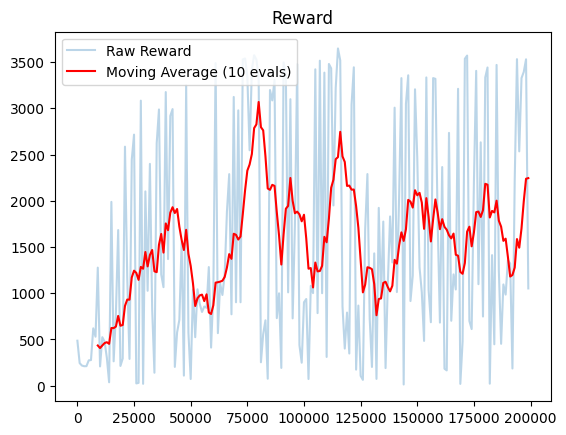

In [ ]:
# Extract reward history
rewards = np.array(agent.learn_hist['reward'])

# Compute moving average with a window of 10
window_size = 10
moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

steps_executed = 1000 * np.arange(len(rewards))

# Plot the reward history
plt.figure()
plt.plot(steps_executed,rewards, label='Raw Reward', alpha=0.3)
plt.plot(1000 *np.arange(window_size - 1, len(rewards)), moving_avg, label='Moving Average (10 evals)', color='red')
plt.title('Reward')
plt.legend()

if not os.path.exists('figures'):
    os.makedirs('figures')

plt.savefig('figures/LearnHist.png')
plt.show()


In [ ]:
# Save the model:
torch.save(agent.actor.to('cpu').state_dict(), 'actor.pth')
torch.save(agent.critic.to('cpu').state_dict(), 'critic.pth')

# Save the reward history
np.save('rewards.npy', rewards)
np.save('reward_mvg.npy', moving_avg)